In [1]:
import numpy as np
import os
from IIR_filter import Raw
from Detect import Detect

In [5]:
recording_name = '20160415_patch2'
Dir = os.path.join('C:/Users/liuxj/Desktop/生医专业/专业实践综合训练2/raw_data',recording_name)
file_name = 'patch_2_MEA.raw'
offset=1871
data = np.memmap(os.path.join(Dir,file_name),dtype='uint16',offset=offset,mode='r')
data = data.reshape(len(data)//256,256)
data = data[:,list(range(10))]#仅选取前10个电极
data = data.astype('float32')

time_series = data
Fs = 20000
print(time_series)
print(Fs)

[[32765. 32763. 32759. ... 32798. 32778. 32772.]
 [32768. 32755. 32793. ... 32793. 32813. 32731.]
 [32774. 32726. 32808. ... 32745. 32788. 32756.]
 ...
 [32716. 32836. 32755. ... 33104. 32754. 32879.]
 [32726. 32821. 32729. ... 32919. 32755. 32813.]
 [32765. 32767. 32769. ... 32772. 32773. 32791.]]
20000


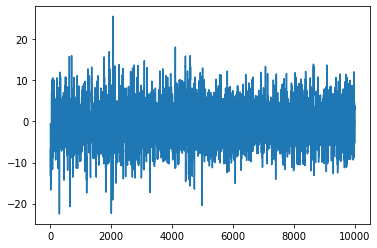

In [6]:
import matplotlib.pyplot as plt
#观察原始波形
raw = Raw(time_series,Fs)
raw.scale(1,-2**15-1)
raw.scale(0.1042,0)
raw.set_unit('uV')
plt.plot(raw.data[0:10000,1])
plt.show()

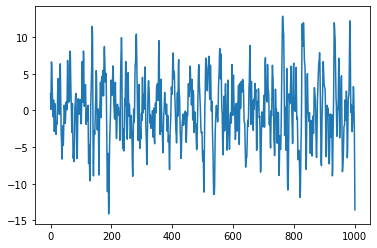

In [7]:
#滤波
spikes = raw.get_spikes()
plt.plot(spikes.data[1000:2001,1])
plt.show()

[7599. 1242. 3615. 3554. 3276. 2785. 3719. 7033. 2926. 6970.]


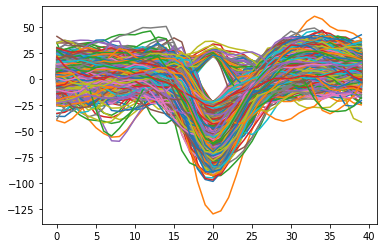

In [9]:
#峰值检测
detect = Detect.extract_by_median(spikes,5)
print(detect.n_spikes)

waveforms = detect.waveforms[2]
for i in range(np.shape(waveforms)[0]):
    plt.plot(waveforms[i,:])